## BioE 131 Lab 3 | Connor Tou

First, we will make a dictionary with the key as the word and the value as the number of occurences of that word

In [2]:
from collections import OrderedDict

# wordDict stores the word and its occurences (key is the word; value is the number of occurences)
wordDict = dict()
numWords = 0

#read line by line, if word exist, occurance +1, if not create item
with open('romeoandjuliet.txt','r') as text:
    for line in text:
        split_line = line.split()
        
        #note that the split line is by spaces and contains other non-alphabet characters
        for word in split_line:
            numWords += 1
            
            # filter with str.isalpha to only get alphabet characters and join them into a string
            word = ''.join(filter(str.isalpha, word))
            word = word.lower()
            
            # if the word is already a key, increase the value count by 1
            if word in wordDict:
                wordDict[word]+=1
                
            # if the word is not present in the dictionary, add it and initialize
            else:
                wordDict[word] =1

# make an ordered dictionary sorted by word occurence values (highest counted word is first key) - used in next 2 parts
ordDict = OrderedDict(sorted(wordDict.items(), key=lambda t: t[1], reverse=True))

print(wordDict)


{'the': 680, 'tragedy': 1, 'of': 401, 'romeo': 137, 'and': 713, 'juliet': 59, 'by': 109, 'william': 1, 'shakespeare': 1, 'dramatis': 1, 'personae': 1, 'chorus': 3, 'escalus': 2, 'prince': 36, 'verona': 15, 'paris': 35, 'a': 468, 'young': 24, 'count': 5, 'kinsman': 13, 'to': 541, 'montague': 31, 'heads': 7, 'two': 25, 'houses': 7, 'at': 70, 'variance': 2, 'with': 255, 'each': 4, 'other': 20, 'capulet': 33, 'an': 86, 'old': 33, 'man': 72, 'family': 1, 'son': 17, 'tybalt': 55, 'nephew': 4, 'lady': 68, 'mercutio': 21, 'friend': 16, 'benvolio': 17, 'friar': 92, 'laurence': 17, 'franciscan': 3, 'john': 9, 'balthasar': 7, 'servant': 7, 'abram': 2, 'sampson': 4, 'gregory': 5, 'peter': 17, 'juliets': 7, 'nurse': 150, 'apothecary': 5, 'three': 10, 'musicians': 9, 'officer': 3, 'wife': 47, 'daughter': 14, 'citizens': 6, 'gentlemen': 11, 'gentlewomen': 2, 'both': 23, 'maskers': 5, 'torchbearers': 2, 'pages': 1, 'guards': 1, 'watchmen': 1, 'servants': 3, 'attendants': 2, 'sceneverona': 1, 'mantua':

### Plotting a bar graph of frequencies in which each word appears

In [3]:
import matplotlib.pyplot as plt
from collections import OrderedDict

# Make Frequency Dictionary
freqDict = dict()
for key in ordDict:
    freqDict[key] = (ordDict.get(key)/numWords)*100

# Analysis for Top 10 Words
topTen_freq = list(freqDict.items())[:10]
topten_DictFreq = dict(topTen_freq)

# Analysis for Lowest 10 Words
lastTen_freq = list(freqDict.items())[len(freqDict)-10:]
lastten_DictFreq = dict(lastTen_freq)

# Bar Charts
plt.bar(range(0, len(freqDict),  1), list(freqDict.values()), align='center')
plt.title("Word Frequencies")
plt.ylabel("Percent of Total Words")
plt.show()

plt.bar(range(10), list(topten_DictFreq.values()), align='center')
plt.xticks(range(10), list(topten_DictFreq.keys()), rotation='vertical');
plt.title("Top Ten Word Frequencies")
plt.xlabel("Word")
plt.ylabel("Percent of Total Words")
plt.show()

plt.bar(range(10), list(lastten_DictFreq.values()), align='center')
plt.xticks(range(10), list(lastten_DictFreq.keys()), rotation='vertical');
plt.title("Lowest 10 Word Frequencies")
plt.xlabel("Word")
plt.ylabel("Percent of Total Words")
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

**What are the ten most frequent words?**
* and
* the
* I
* to
* a
* of
* my
* that
* is
* in

**What about the least frequent?**
* jointure
* demand
* statue
* whiles
* figure
* sacrifices
* glooming
* pardond
* punished
* omnes

**Comment on what this might mean.**
* The structure of enlgish sentences (even in Shakespearian time / plays) mainly consist of connecting words such as prepositions, pronouns, conjunctions, etc. 

### Plotting Word Count vs Rank (and log-log plot)

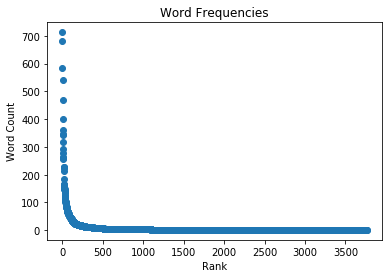

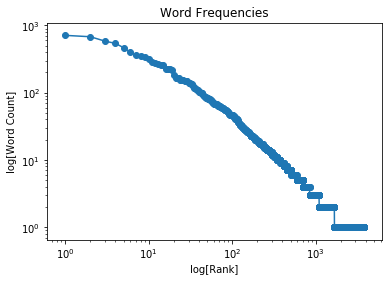

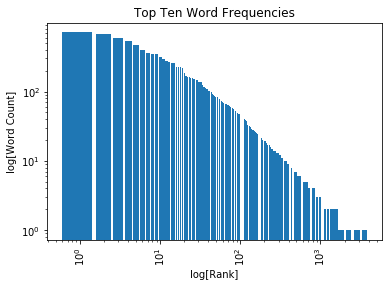

In [22]:
word_count = list(ordDict.values())[:]
rank = list(range(1,len(ordDict)+1))

# Linear Plot as a scatter plot
plt.scatter(
    [rank],
    [word_count],
)
plt.title("Word Frequencies")
plt.ylabel("Word Count")
plt.xlabel("Rank")
plt.show()

#Log Plot as a scatter plot
plt.loglog(rank, word_count, basex=10)
plt.scatter([rank], [word_count])
plt.title("Word Frequencies")
plt.ylabel("log[Word Count]")
plt.xlabel("log[Rank]")
plt.show()

#Log Plot as a bar plot
plt.bar(rank, word_count, align='center')
plt.xticks(rank, rotation='vertical');
plt.title("Top Ten Word Frequencies")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log[Rank]")
plt.ylabel("log[Word Count]")
plt.show()

**What does this look like? Can you try to interpret this?**
* As a bar plot, it could be said to look like a sequencing logo where thicker and taller bars means a higher frequency in the given text.

## END OF LAB 3